В данной домашней работе все задачи — практические. В них необходимо попытаться применить
все возможные инструменты, которые мы изучали, чтобы ответить на заданный в задаче вопрос.
Не забывайте об одном из самых важных инструментов — визуализации. Ваши решения необходимо
сопроводить краткими комментариями и выводами, которые Вы сделали на основе анализа.

Все сопутсвующие файлы находятся в папке hw_2_data

**Упражнение 1.** В файле anorexia.txt записан вес пациентов до начала терапии анорексии и после ее окончания. Была ли терапия в эффективна?

**Упражнение 2.** В файле weights.txt записан вес пациентов мужского и женского
пола. Есть ли значимые различия в весе мужчин и женщин?

**Упражнение 3.** В файле seattle.txt записаны цены на недвижимость в одном из районов Сиэтла в 2001 году и в 2002 году (объекты недвижимости выбирались случайно). Изменились
ли в среднем цены в этом районе за год?

**Упражнение 4.** В рамках исследования эффективности препарата метилфенидат пациенты с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и
после недельного курса каждый испытуемые проходили второй тест. Был ли эффект от применения
препарата? Данные находятся в файле methylphenidate.txt.

---

# Упражнение 1

Для анализа эффективности терапии анорексии в данном упражнении мы можем использовать парный t-тест Стьюдента, чтобы сравнить средний вес пациентов до и после терапии. Также дополнительно проведем визуализацию данных и оценим распределение разницы весов для проверки предположений t-теста.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, shapiro

data = pd.read_csv("hw_2_data/anorexia.txt", sep="\t")

          Before       After
count  29.000000   29.000000
mean   82.689655   85.696552
std     4.845495    8.351924
min    70.000000   71.300000
25%    80.400000   81.900000
50%    82.600000   83.900000
75%    85.000000   90.900000
max    94.900000  103.600000


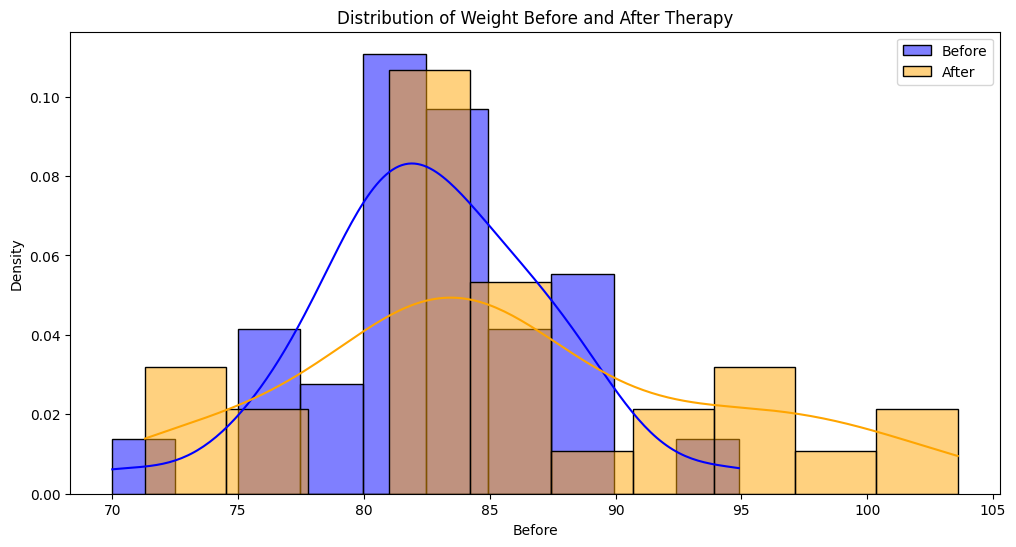

Shapiro-Wilk test for normality: p-value = 0.007945123926958184
T-test: t-statistic = -2.2155878439311656, p-value = 0.03502259756218885


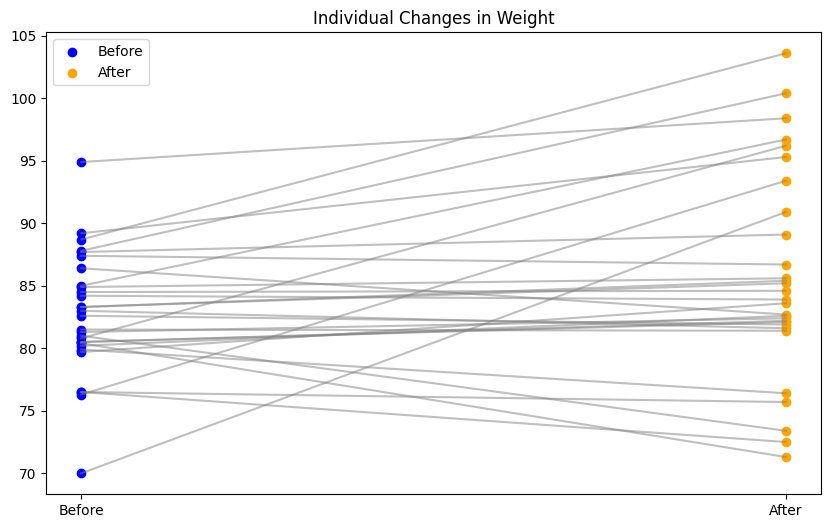

In [7]:
print(data.describe())

# Визуализация распределения веса до и после
plt.figure(figsize=(12, 6))
sns.histplot(data["Before"], color="blue", label="Before", kde=True, stat="density", bins=10)
sns.histplot(data["After"], color="orange", label="After", kde=True, stat="density", bins=10)
plt.legend()
plt.title("Distribution of Weight Before and After Therapy")
plt.show()

data["Difference"] = data["After"] - data["Before"]

# Проверка нормальности разностей (тест Шапиро-Уилка)
shapiro_test = shapiro(data["Difference"])
print(f"Shapiro-Wilk test for normality: p-value = {shapiro_test.pvalue}")

# T-тест Стьюдента
t_stat, p_value = ttest_rel(data["Before"], data["After"])
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")

# Визуализация изменений веса (lineplot)
plt.figure(figsize=(10, 6))
for i in range(len(data)):
    plt.plot([0, 1], [data.loc[i, "Before"], data.loc[i, "After"]], color="gray", alpha=0.5)
plt.scatter([0]*len(data), data["Before"], color="blue", label="Before")
plt.scatter([1]*len(data), data["After"], color="orange", label="After")
plt.xticks([0, 1], ["Before", "After"])
plt.title("Individual Changes in Weight")
plt.legend()
plt.show()

## Анализ данных и результатов

### Описательная статистика
Средний вес пациентов до терапии составляет 82.69 кг, после терапии — 85.70 кг. Видно, что средний вес увеличился.
Стандартное отклонение увеличилось после терапии (8.35 кг против 4.85 кг), что говорит о большей вариативности веса после лечения.
Минимальный и максимальный вес также значительно изменились, особенно в сторону увеличения максимального значения (с 94.9 кг до 103.6 кг).
### Проверка нормальности распределения разностей
Тест Шапиро-Уилка дал p-value = 0.0079, что меньше 0.05. Это говорит о том, что разности весов не распределены нормально.
Ненормальность разностей ограничивает корректность t-теста, и стоит дополнительно рассмотреть использование теста Вилкоксона.
### Результаты t-теста
Парный t-тест показал t-статистику -2.22 и p-value = 0.035, что меньше 0.05. Мы можем отвергнуть нулевую гипотезу и заключить, что терапия статистически значимо изменила вес пациентов.
Однако отрицательная t-статистика показывает, что изменения веса направлены вниз в некоторых случаях, что также нужно учитывать при интерпретации.
### Визуализация
На графике видно, что распределение веса после терапии смещается вправо, что указывает на увеличение веса у большинства пациентов.
У некоторых пациентов изменения веса значительны, что можно видеть из более широкой "хвостовой" части гистограммы после терапии.

### Возможные выводы
Терапия статистически значимо изменила вес пациентов, но изменения не равномерны, и результаты разностей весов не подчиняются нормальному распределению.
Некоторые пациенты показали значительное увеличение веса, что может быть связано как с индивидуальными особенностями, так и с возможными побочными эффектами терапии.

# Упражнение 2

Описательная статистика:
        count   mean        std   min     25%    50%     75%   max
Group                                                            
Man     10.0  68.96   9.031205  60.0  62.650  65.80  73.025  89.4
Woman   10.0  51.90  14.718318  21.8  48.425  49.45  62.850  73.3

Тест Шапиро-Уилка:
Женщины: p-value = 0.5617518716114733
Мужчины: p-value = 0.09440544903747673

Тест Левена (равенство дисперсий):
p-value = 0.30803862209455396

t-тест:
t-статистика = -3.124146252379086, p-value = 0.005861212279435217


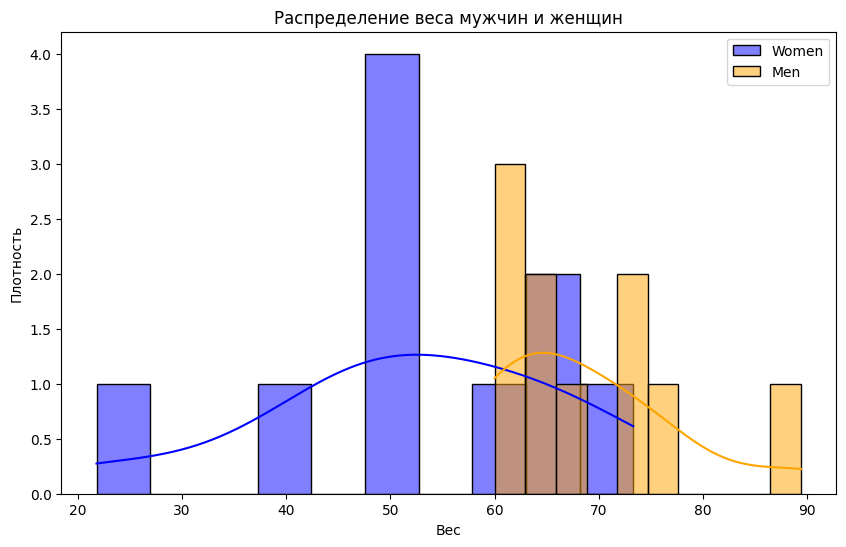

C:\Users\Sankek\AppData\Local\Temp\ipykernel_19656\1509840433.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Weight", data=data, palette="Set2")


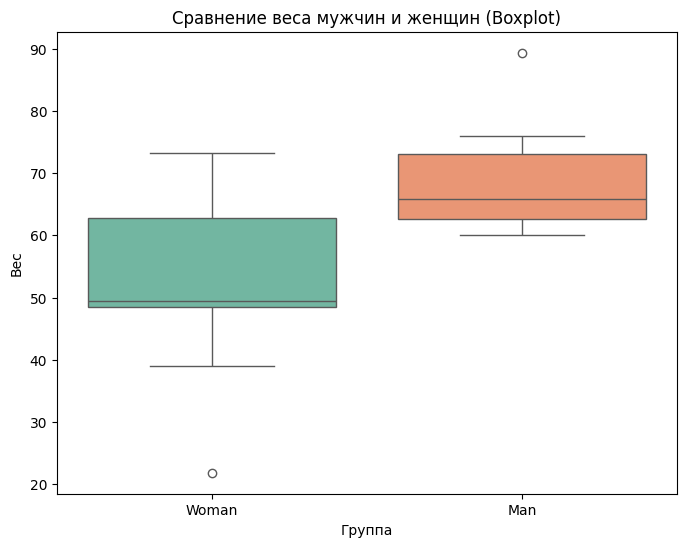

In [14]:
import pandas as pd
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu

data = pd.read_csv("hw_2_data/weights.txt", sep="\t")

# Разделение данных
women = data[data["Group"] == "Woman"]["Weight"]
men = data[data["Group"] == "Man"]["Weight"]

summary = data.groupby("Group")["Weight"].describe()
print("Описательная статистика:\n", summary)

# Проверка нормальности
shapiro_women = shapiro(women)
shapiro_men = shapiro(men)
print("\nТест Шапиро-Уилка:")
print(f"Женщины: p-value = {shapiro_women.pvalue}")
print(f"Мужчины: p-value = {shapiro_men.pvalue}")

# Проверка равенства дисперсий
levene_test = levene(women, men)
print("\nТест Левена (равенство дисперсий):")
print(f"p-value = {levene_test.pvalue}")

# t-тест или тест Манна-Уитни
if shapiro_women.pvalue > 0.05 and shapiro_men.pvalue > 0.05 and levene_test.pvalue > 0.05:
    t_test = ttest_ind(women, men)
    print("\nt-тест:")
    print(f"t-статистика = {t_test.statistic}, p-value = {t_test.pvalue}")
else:
    mann_whitney = mannwhitneyu(women, men, alternative='two-sided')
    print("\nТест Манна-Уитни:")
    print(f"U-статистика = {mann_whitney.statistic}, p-value = {mann_whitney.pvalue}")
    
    
# Гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data[data["Group"] == "Woman"]["Weight"], color="blue", label="Women", kde=True, bins=10)
sns.histplot(data[data["Group"] == "Man"]["Weight"], color="orange", label="Men", kde=True, bins=10)
plt.title("Распределение веса мужчин и женщин")
plt.xlabel("Вес")
plt.ylabel("Плотность")
plt.legend()
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Group", y="Weight", data=data, palette="Set2")
plt.title("Сравнение веса мужчин и женщин (Boxplot)")
plt.xlabel("Группа")
plt.ylabel("Вес")
plt.show()

## Анализ результатов
### Описательная статистика:

- Средний вес мужчин: 68.96 кг, женщин: 51.90 кг.
- Стандартное отклонение выше у женщин (14.72 кг против 9.03 кг у мужчин), что указывает на больший разброс значений.
- Минимальное значение веса у женщин значительно ниже, чем у мужчин, что может свидетельствовать о наличии выбросов.
### Тест Шапиро-Уилка (проверка на нормальность):

- p-value для обеих групп превышает 0.05:
- Для женщин: 0.561.
- Для мужчин: 0.094.
Это означает, что данные в обеих группах можно считать нормально распределёнными.
### Тест Левена (проверка равенства дисперсий):

- p-value: 0.308 (больше 0.05), что говорит о равенстве дисперсий между группами.
### t-тест для независимых выборок:

- t-статистика: -3.124.
- p-value: 0.00586 (меньше 0.05).
Нулевая гипотеза о равенстве среднего веса мужчин и женщин отвергается.

### Визуализация 
- Гистограмма распределения веса:
На графике видно, что мужчины склонны к большему весу, а распределение у женщин более "размытое", вероятно, из-за большего стандартного отклонения.

- Boxplot четко показывает медианные значения веса, межквартильный размах и выбросы. Видно, что медиана и весь диапазон значений веса у мужчин выше, чем у женщин.
### Вывод
На основании t-теста можно заключить, что средний вес мужчин и женщин статистически значимо различается. Уровень значимости p-value = 0.00586 подтверждает, что это различие маловероятно объясняется случайностью.

# Упражнение 3

Описательная статистика:
       count       mean         std   min     25%      50%       75%     max
Year                                                                       
2001   50.0  288.92654  157.777757  50.0  190.25  260.800  406.7375   710.0
2002   50.0  329.25714  316.830045  50.0  176.20  244.925  328.6250  1850.0
Шапиро-Уилк для 2001 года: p-value = 0.039439434411888505
Шапиро-Уилк для 2002 года: p-value = 2.423699739864027e-10
Тест Левена: p-value = 0.4449401333159455
T-тест: t-статистика = -0.8057258725189664, p-value = 0.42235167114691463


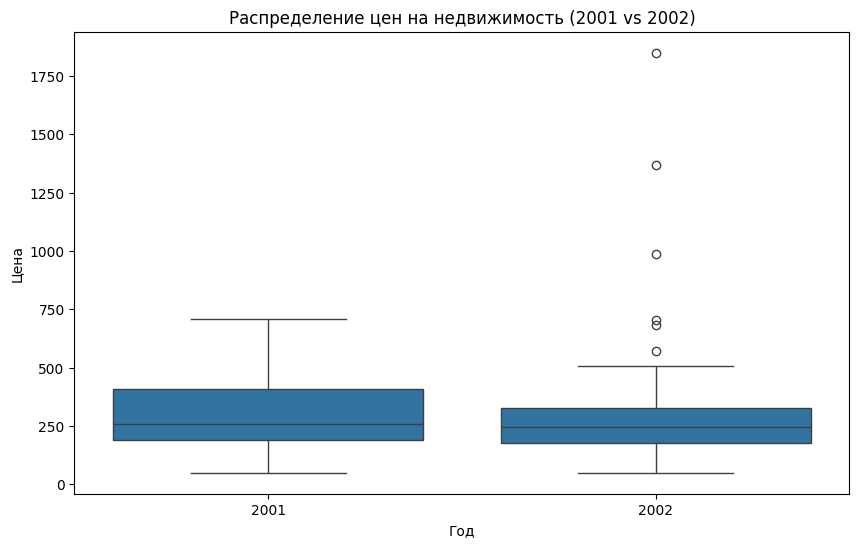

In [20]:
import scipy.stats as stats

df = pd.read_csv("hw_2_data/seattle.txt", sep="\t")

summary = df.groupby("Year")["Price"].describe()
print("Описательная статистика:\n", summary)

# Разделение данных по годам
prices_2001 = df[df['Year'] == 2001]['Price']
prices_2002 = df[df['Year'] == 2002]['Price']

# Шапиро-Уилк
shapiro_2001 = stats.shapiro(prices_2001)
shapiro_2002 = stats.shapiro(prices_2002)

# Левен
levene = stats.levene(prices_2001, prices_2002)

# Парный t-тест
ttest = stats.ttest_ind(prices_2001, prices_2002)

# Вывод результатов
print(f"Шапиро-Уилк для 2001 года: p-value = {shapiro_2001.pvalue}")
print(f"Шапиро-Уилк для 2002 года: p-value = {shapiro_2002.pvalue}")
print(f"Тест Левена: p-value = {levene.pvalue}")
print(f"T-тест: t-статистика = {ttest.statistic}, p-value = {ttest.pvalue}")

# Визуализация
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Price', data=df)
plt.title("Распределение цен на недвижимость (2001 vs 2002)")
plt.ylabel("Цена")
plt.xlabel("Год")
plt.show()


### Описательная статистика

- Средняя цена в 2002 году выше, чем в 2001 году (329.26 против 288.93), но дисперсия в 2002 году также значительно выше (std = 316.83 против 157.78).
- Максимальная цена в 2002 году (1850.0) заметно превышает максимальную цену в 2001 году (710.0)
### Тест Шапиро-Уилка:

- Для обеих выборок p-value < 0.05, что указывает на отклонение от нормальности. Это требует осторожности при использовании t-теста, так как он предполагает нормальное распределение.
### Тест Левена:
- p-value = 0.444, что говорит о равенстве дисперсий в двух выборках. Это позволяет использовать t-тест, но с оговоркой по поводу ненормальности данных.
### T-тест:

- t-статистика = -0.8057, p-value = 0.4223. Это значит, что разница в средних ценах между 2001 и 2002 годами статистически незначима при уровне значимости 0.05.


Хотя средние цены в 2002 году выше, статистически значимой разницы между ними и ценами в 2001 году не обнаружено. Однако стоит отметить ненормальность данных и наличие выбросов в 2002 году

In [24]:
def find_outliers(series):
    Q1 = np.percentile(series, 25)
    Q3 = np.percentile(series, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

outliers_2002 = find_outliers(prices_2002)

# Удаление выбросов из 2002 года
prices_2002_no_outliers = prices_2002[~prices_2002.isin(outliers_2002)]

# Тест Манна-Уитни для данных без выбросов
mann_whitney_test = mannwhitneyu(prices_2001, prices_2002_no_outliers, alternative="two-sided")

print(f"{outliers_2002=}\n{mann_whitney_test.statistic=}\n{mann_whitney_test.pvalue=}")

outliers_2002=16    1370.0
27     684.5
29     570.0
40     705.0
41    1850.0
46     987.5
Name: Price, dtype: float64
mann_whitney_test.statistic=1291.5
mann_whitney_test.pvalue=0.1478098711121959


После удаления выбросов, результат теста Манна-Уитни для сравнения цен говорит о том, что при уровне значимости 0.05 мы не можем отвергнуть нулевую гипотезу, то есть различия между годами не являются статистически значимыми.

# Упражнение 4

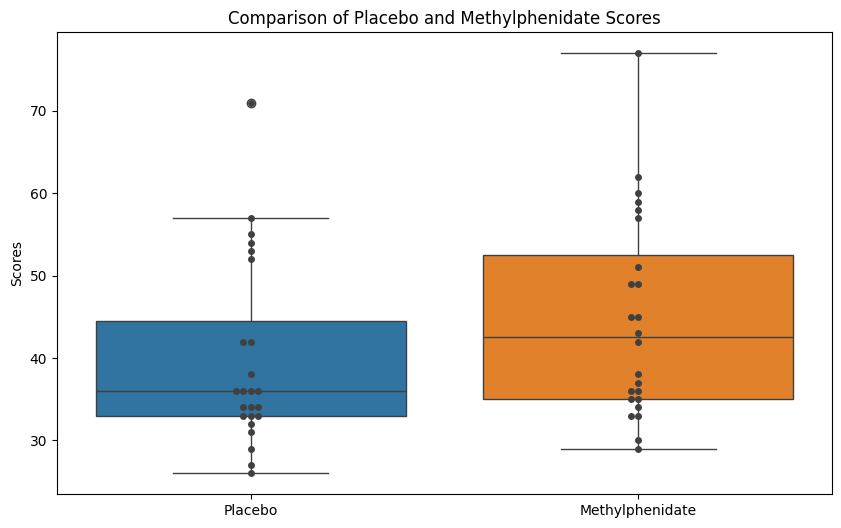

(ShapiroResult(statistic=0.9798055514849737, pvalue=0.8922548070861911),
 TtestResult(statistic=3.222362445123041, pvalue=0.003771488176381471, df=23),
 WilcoxonResult(statistic=48.5, pvalue=0.002814650535583496))

In [28]:
df = pd.read_csv("hw_2_data/methylphenidate.txt", sep="\t")
df[['Placebo', 'Methylphenidate']] = df['Placebo Methylphenidate'].str.split(' ', expand=True).astype(int)

# Вычисляем разности
df['Difference'] = df['Methylphenidate'] - df['Placebo']

# Статистические тесты
shapiro_result = shapiro(df['Difference'])
t_test_result = ttest_rel(df['Methylphenidate'], df['Placebo'])
wilcoxon_result = wilcoxon(df['Methylphenidate'], df['Placebo'])

# График
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Placebo', 'Methylphenidate']])
sns.swarmplot(data=df[['Placebo', 'Methylphenidate']], color=".25")
plt.title("Comparison of Placebo and Methylphenidate Scores")
plt.ylabel("Scores")
plt.show()

shapiro_result, t_test_result, wilcoxon_result

### Тест Шапиро-Уилка для разности:
p-value = 0.892

Разность значений между группами (плацебо и метилфенидат) соответствует нормальному распределению.
### Парный t-тест
t-статистика = 3.22, p-value = 0.0038

Значимое различие между результатами теста после приема плацебо и метилфенидата. Это указывает на эффект от препарата.
### Тест Вилкоксона

p-value = 0.0028 (Также показывает значимое различие между группами)

### Вывод:
Существует статистически значимый эффект от применения метилфенидата по сравнению с плацебо. Это подтверждается как параметрическим t-тестом, так и непараметрическим тестом Вилкоксона.

График также показывает сдвиг в результатах между группами, подтверждая эффект препарата